
# Project: [WeRateDogs] Data Wrangling

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gathering">Gathering Data</a></li>
    <li><a href="#assessing">Assessing Data</a></li>
    <li><a href="#cleaning">Cleaning Data</a></li>
    <li><a href="#storing">Storing Data</a></li>
    <li><a href="#analysing">Analyzing and Visualizing</a></li>
</ul>

<a id='intro'></a>
## Introduction

The process of gathering data for analysis can include gathering from varitety of sources, in different formats. The dataset we are about to wrangle (analyse and visualize) is the tweet arhcive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs).

WeRateDogs is a Twitter account that rates people's dogs witha. humoroius comment about the dog. We have an archived data that contains basic tweet data (weet ID, timestamp, text, etc) for over 5,000 tweets as they stood on August 1, 2017.

We would be working with 3 differente datasets in this project.
1. Enhanced Twitter Archive
2. Image Predictions File
3. Additional Data via the Twitter API

<a id='gathering'></a>
## Gathering Data

The goal here is to gather all the 3 datasets described in the introduction section.

In [849]:
# Importation of the gathered list of all packages to be used.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import tweepy
import json
from timeit import default_timer as timer

%matplotlib inline
sns.set_theme()

### 1. Enhanced Twitter Archive

The method for getting this dataset is by manual download, save it into our project folder and read it into a panda dataframe.

In [2]:
# Download and read the twitter archive data into a DataFrame

df_tweets_archived = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
df_tweets_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Image Predictions File

The method for getting this dataset is by programmatically downloading and savign the file into our project folder. We have been provided with the url, we need to use the `request` library to download the file.

In [159]:
# Download Image Predictiosn data via `request` library and store it.

# Source URL
image_predictions_source = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

with open("image-predictions.tsv", mode="wb") as file:
    response = requests.get(image_predictions_source)
    file.write(response.content)
    
df_image_predictions = pd.read_csv("image-predictions.tsv", delimiter="\t")
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Additional Twitter Data

The method for getting this dataset is by using an API, Twitter's API specifically.

We have gone throught the process of creating a regular and developer's account on Twitter, so we can have access to the create a project on the portal.

In [5]:
# Setup credentials to setup tweepy's OAuth1UserHandler (previoulsy OAuthHandler) instance

consumer_key = 'XXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXX'
access_token = 'XXXXXXXXXXX'
access_secret = 'XXXXXXXXXXX'

auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, 
   access_token, access_secret
)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Gather list of tweet's ids in archived dataset

tweet_ids = df_tweets_archived.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive (tweet_ids)

# Store list of tweets fetch that failed
tweetfetch_fails = {}

# Timer
start = timer()
print('Start - {}'.format(start))

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for id in tweet_ids:
        try:
            tweet = api.get_status(id)
            
            tweet_info = {
                "id": str(id),
                "retweet_count": str(tweet._json['retweet_count']),
                "favorite_count": str(tweet._json['favorite_count'])
            }
            json.dump(tweet_info, outfile)
            outfile.write('\n')
            
        except tweepy.errors.TweepyException as e:
            tweetfetch_fails[id] = e
            pass
end = timer()
print('End - {} \n'.format(end))

print('Duration - {}'.format(end - start))
print(tweetfetch_fails)


Start - 45.364935291


Rate limit reached. Sleeping for: 171
Rate limit reached. Sleeping for: 243


End - 2192.832309083 

Duration - 2147.4673737919998
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 877611172832227328: Forbidden('403 Forbidden\n179 - Sorry, you are not authorized to see this status.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 8

In [152]:
# Reading our saved tweet_json file

tweets_fetched = []

with open("tweet_json.txt", "r") as tweet_json:
    for tweet in tweet_json.readlines():
        tweets_fetched.append(json.loads(tweet.strip()))
        
tweets_fetched[0:2]

[{'id': '892420643555336193',
  'retweet_count': '6877',
  'favorite_count': '32906'},
 {'id': '892177421306343426',
  'retweet_count': '5179',
  'favorite_count': '28436'}]

In [154]:
df_tweets_fetched = pd.DataFrame(tweets_fetched)
df_tweets_fetched.head()

,id,retweet_count,favorite_count
0,892420643555336193,6877,32906
1,892177421306343426,5179,28436
2,891815181378084864,3422,21373
3,891689557279858688,7086,35873
4,891327558926688256,7598,34311


<a id='assessing'></a>
## Assessing Data

We want to perform both Visual and Programmatic assessment of our gathered datasets. This will enable us identify any possible data qaulity or data tidiness issues and document it.

Our datasets

1. `df_tweets_archived`
2. `df_image_predictions`
3. `df_tweets_fetched`

#### Assessing `df_tweets_archived`

In [58]:
df_tweets_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [59]:
df_tweets_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [60]:
df_tweets_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [64]:
zero_denominators = df_tweets_archived[df_tweets_archived.rating_denominator < 1]
zero_denominators

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [65]:
zero_numerators = df_tweets_archived[df_tweets_archived.rating_numerator < 1]
zero_numerators

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


#### Assessing `df_image_predictions`

In [66]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [67]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assessing `df_tweets_fetched`

In [69]:
df_tweets_fetched

,id,retweet_count,favorite_count
0,892420643555336193,6877,32906
1,892177421306343426,5179,28436
2,891815181378084864,3422,21373
3,891689557279858688,7086,35873
4,891327558926688256,7598,34311
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


In [70]:
df_tweets_fetched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2325 non-null   object
 1   retweet_count   2325 non-null   object
 2   favorite_count  2325 non-null   object
dtypes: object(3)
memory usage: 54.6+ KB


In [73]:
df_tweets_fetched.describe()

,id,retweet_count,favorite_count
count,2325,2325,2325
unique,2325,1617,1982
top,892420643555336193,644,0
freq,1,6,158


### Quality Issues

`df_tweets_archived` table
- Column *timestamp* is an object not a datetime
- Columns [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] are not relevant
- A lot of entries have all stages [doggo, floofer, pupper, puppo] as None.
- The tweet 835246439529840640, has a *rating_denominator* of 0.
- The tweets [835152434251116546, 746906459439529985] have a *rating_numeratior* or 0.

`df_image_predictions` table
- Inconsistency in the naming format for p1, p2 and p3 columns

`df_tweets_fetched` table
- [id, retweet_count, favorite_count] are string not an int
- Rename "id" to tweet_id
- Missing records due to the data of some tweets not being retrievable (2325 instead of 2356)

### Tidiness Issues
- `source` in `df_tweets_archived` is an html element not a string (url)
- One variable in four columns in `df_tweets_archived` table (stage)
- Two datasets (`df_tweets_archived` and `df_tweets_fetched`) can be converted to one [df_tweets]
- Three columns represents possible dog breed

<a id='cleaning'></a>
## Cleaning Data

We want to proceed to clean our data based on the quality and tidiness issues we documented in the previous section.
The steps we would follow to tackle each issue is, we **define** the issue, **code** the solution and **test** approve to ensure it has been resolved.

Define - we summarise how we plan on fixing the issue.
Code - we write code to fix the issue.
Test - we test the dataset to see if the issue has been fixed.

In [916]:
# Make copy of datasets before cleaning

df_tweets_archived_clean = df_tweets_archived.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_fetched_clean = df_tweets_fetched.copy()

#### `df_tweets_archived`:  
    - Column timestamp is an object not a datetime

##### Define
*Convert the values in the timestamp column into a datetime datatype.*

##### Code

In [917]:
df_tweets_archived_clean['timestamp'] = pd.to_datetime(df_tweets_archived_clean['timestamp'])

##### Test

In [918]:
df_tweets_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### `df_tweets_archived`:  
    - Columns [in_reply_to_status_id, in_reply_to_user_id, expanded_urls, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] are not relevant.

##### Define
*Drop these columns.*

##### Code

In [919]:
columns = ['in_reply_to_status_id', 
           'in_reply_to_user_id',
           'expanded_urls',
           'retweeted_status_id', 
           'retweeted_status_user_id', 
           'retweeted_status_timestamp']

df_tweets_archived_clean.drop(labels=columns, axis=1, inplace=True)

##### Test

In [920]:
df_tweets_archived_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


#### `df_tweets_archived`:  
    - A lot of entries have all stages [doggo, floofer, pupper, puppo] as None.

##### Define

Set default for entries without a stage. We would be using "floofer" as our default, this is because it's the stage that any dog can be categorised into (based on Dogtionary and Project Overview)

##### Code

In [921]:
conditions = [
    (df_tweets_archived_clean['doggo'] == "doggo"),
    (df_tweets_archived_clean['floofer'] == "floofer"),
    (df_tweets_archived_clean['pupper'] == "pupper"),
    (df_tweets_archived_clean['puppo'] == "puppo")
]

values = ["doggo", "floofer", "pupper", "puppo"]

df_tweets_archived_clean['stage'] = np.select(conditions, values, "floofer" )

##### Test

In [922]:
print(df_tweets_archived_clean.stage.value_counts())

floofer    1985
pupper      245
doggo        97
puppo        29
Name: stage, dtype: int64


#### `df_tweets_archived`:  
    - The tweet (835246439529840640) has a denominator of 0
    - The tweets (835152434251116546, 746906459439529985) have numerator as 0

##### Define
*Remove these entries.*

##### Code

In [923]:
ids = [835246439529840640, 835152434251116546, 746906459439529985]
df_tweets_archived_clean.query('tweet_id not in {}'.format(ids), inplace=True)

##### Test

In [924]:
df_tweets_archived_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.353000e+03,2353.000000,2353.000000
mean,7.426913e+17,12.735232,10.460263
std,6.855770e+16,41.543437,6.746079
min,6.660209e+17,1.000000,2.000000
25%,6.783968e+17,10.000000,10.000000
50%,7.193678e+17,11.000000,10.000000
75%,7.992971e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


#### `df_tweets_archived`:  
    - source in df_tweets_archived is an html element not a string (url)

##### Define
*We would extract the url from the html a element*

##### Code

In [925]:
df_tweets_archived_clean['source_url'] = df_tweets_archived_clean.source.str.extract('(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)', expand=True)
df_tweets_archived_clean.drop('source', axis=1, inplace=True)

##### Test

In [926]:
df_tweets_archived_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,source_url
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,floofer,http://twitter.com/download/iphone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,floofer,http://twitter.com/download/iphone


#### `df_tweets_archived`:  
    - One [doggo, floofer, pupper, puppo] variable in two columns in df_tweets_archived table (stage)

##### Define

Combine four columns into one (called stage). This would reduced the number of columns we have to work with in the dataset. 
Note - based on our cleaning action to set a default for entries with no dog stage, we have created a column [stage] that services this purpose, we can proceed to drop the columns [doggo, floofer, pupper, puppo]

##### Code

In [927]:
df_tweets_archived_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

##### Test

In [928]:
df_tweets_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2353 non-null   int64              
 1   timestamp           2353 non-null   datetime64[ns, UTC]
 2   text                2353 non-null   object             
 3   rating_numerator    2353 non-null   int64              
 4   rating_denominator  2353 non-null   int64              
 5   name                2353 non-null   object             
 6   stage               2353 non-null   object             
 7   source_url          2353 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 165.4+ KB


In [930]:
df_tweets_archived_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,source_url
2275,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,floofer,http://twitter.com
1069,740365076218183684,2016-06-08 02:09:24+00:00,When the photographer forgets to tell you wher...,10,10,None,floofer,http://twitter.com/download/iphone
1678,682047327939461121,2015-12-30 03:55:29+00:00,We normally don't rate bears but this one seem...,10,10,None,floofer,http://twitter.com/download/iphone
685,788150585577050112,2016-10-17 22:51:57+00:00,This is Leo. He's a golden chow. Rather h*ckin...,13,10,Leo,floofer,http://twitter.com/download/iphone
93,874057562936811520,2017-06-12 00:15:36+00:00,"I can't believe this keeps happening. This, is...",12,10,None,floofer,http://twitter.com/download/iphone


#### `df_image_predictions`:  
    - Inconsistency in the naming format for p1, p2 and p3 columns

##### Define
*We want all the names in p1, p2 and p3 follow the same format of lowercase, and separted by '_'.*

##### Code

In [931]:
def format_name(name):
    return name.lower().replace('-', '_')

def format_column_values(data, column):
    data[column] = data[column].apply(lambda x: format_name(x))

format_column_values(df_image_predictions_clean,'p1')
format_column_values(df_image_predictions_clean,'p2')
format_column_values(df_image_predictions_clean,'p3')

##### Test

In [932]:
df_image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


#### `df_image_predictions`:  
    - Three columns represents possible dog breed

##### Define

*Create new column 'breed' based on the highest confidenfen level in (p1, p2, p3) that is also a dog breed.*

##### Code

In [933]:
# Confirming that all p1_conf is always greater than p2_conf

sum(df_image_predictions_clean['p1_conf'] > df_image_predictions['p2_conf'])

2075

In [934]:
# Confirming that all p1_conf is always greater than p2_conf

sum(df_image_predictions_clean['p2_conf'] > df_image_predictions['p3_conf'])

2075

In [935]:
# Categorise to possible_breed based on the highest confidence level and if it's a breed of dog.
# Set 'None' if it's not.

conditions = [
    (df_image_predictions_clean['p1_dog'] == True),
    (df_image_predictions_clean['p2_dog'] == True),
    (df_image_predictions_clean['p3_dog'] == True)
]

values = [df_image_predictions_clean['p1'], df_image_predictions_clean['p2'], df_image_predictions_clean['p3']]


df_image_predictions_clean['possible_breed'] = np.select(conditions, values, "None" )

##### Test

In [936]:
df_image_predictions_clean['possible_breed'].value_counts()

None                    324
golden_retriever        173
labrador_retriever      113
pembroke                 96
chihuahua                95
                       ... 
scotch_terrier            1
entlebucher               1
japanese_spaniel          1
standard_schnauzer        1
bouvier_des_flandres      1
Name: possible_breed, Length: 114, dtype: int64

In [937]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,possible_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher


#### `df_tweets_fetched`:  
    - [id, retweet_count, favorite_count] are string not an int

##### Define
*We would change the data type of the values in this column.*

##### Code

In [938]:
def convert_type(data, column, type):
    data[column] = data[column].astype(type)
    
convert_type(df_tweets_fetched_clean, "id", "int")
convert_type(df_tweets_fetched_clean, "retweet_count", "int")
convert_type(df_tweets_fetched_clean, "favorite_count", "int")

##### Test

In [939]:
df_tweets_fetched_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


#### `df_tweets_fetched`:  
    - Rename "id" to "tweet_id"

##### Define
*We rename the column "id" to "tweet_id" so it is aligned with the other datasets.*

##### Code

In [940]:
df_tweets_fetched_clean.rename(columns={"id":"tweet_id"}, inplace=True)

##### Test

In [941]:
df_tweets_fetched_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


#### `df_tweets`:  
    - Two datasets (df_tweets_archived_clean and df_tweets_fetched_clean) can be converted to one

##### Define

The goal here is to merge the two dataframes specified above, so as to reduce the number of datasets we have to work with

##### Code

In [942]:
df_tweets = df_tweets_fetched_clean.merge(right=df_tweets_archived_clean, on="tweet_id", how="inner")

##### Test

In [943]:
print(df_tweets.info())
df_tweets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 0 to 2321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2322 non-null   int64              
 1   retweet_count       2322 non-null   int64              
 2   favorite_count      2322 non-null   int64              
 3   timestamp           2322 non-null   datetime64[ns, UTC]
 4   text                2322 non-null   object             
 5   rating_numerator    2322 non-null   int64              
 6   rating_denominator  2322 non-null   int64              
 7   name                2322 non-null   object             
 8   stage               2322 non-null   object             
 9   source_url          2322 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 199.5+ KB
None


,tweet_id,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,stage,source_url
0,892420643555336193,6877,32906,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,floofer,http://twitter.com/download/iphone
1,892177421306343426,5179,28436,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,floofer,http://twitter.com/download/iphone
2,891815181378084864,3422,21373,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,floofer,http://twitter.com/download/iphone
3,891689557279858688,7086,35873,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,floofer,http://twitter.com/download/iphone
4,891327558926688256,7598,34311,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,floofer,http://twitter.com/download/iphone
...,...,...,...,...,...,...,...,...,...,...
2317,666049248165822465,35,85,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,floofer,http://twitter.com/download/iphone
2318,666044226329800704,113,243,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,floofer,http://twitter.com/download/iphone
2319,666033412701032449,35,98,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,a,floofer,http://twitter.com/download/iphone
2320,666029285002620928,39,111,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,a,floofer,http://twitter.com/download/iphone


#### `df_tweets_master`

We can further merge `df_image_predictions` with `df_tweets`, so we know we are left with a dataset that has every possible information we need [image prediction information, retweet and favorite count information]

In [944]:
df_tweets_master = df_image_predictions_clean.merge(right=df_tweets, on="tweet_id", how="inner")

In [945]:
print(df_tweets_master.info())
df_tweets_master.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2053 non-null   int64              
 1   jpg_url             2053 non-null   object             
 2   img_num             2053 non-null   int64              
 3   p1                  2053 non-null   object             
 4   p1_conf             2053 non-null   float64            
 5   p1_dog              2053 non-null   bool               
 6   p2                  2053 non-null   object             
 7   p2_conf             2053 non-null   float64            
 8   p2_dog              2053 non-null   bool               
 9   p3                  2053 non-null   object             
 10  p3_conf             2053 non-null   float64            
 11  p3_dog              2053 non-null   bool               
 12  possible_breed      2053 non-null 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,possible_breed,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,stage,source_url
1259,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire_haired_fox_terrier,0.204082,True,english_setter,...,borzoi,2024,5288,2016-07-01 17:33:49+00:00,Say hello to Divine Doggo. Must be magical af....,13,10,Divine,doggo,http://twitter.com/download/iphone
1410,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,...,golden_retriever,2666,8403,2016-09-01 00:04:38+00:00,This is Dixie. She wants to be a ship captain....,11,10,Dixie,floofer,http://twitter.com/download/iphone
1593,799757965289017345,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,border_collie,0.442534,True,collie,0.288684,True,shetland_sheepdog,...,border_collie,1975,7757,2016-11-18 23:35:32+00:00,This is Sobe. She's a h*ckin happy doggo. Only...,13,10,Sobe,doggo,http://twitter.com/download/iphone
801,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,shetland_sheepdog,0.551206,True,collie,0.232544,True,border_collie,...,shetland_sheepdog,998,3653,2016-01-25 03:16:56+00:00,Say hello to Leo. He's a Fallopian Puffalope. ...,12,10,Leo,floofer,http://twitter.com/download/iphone
743,687480748861947905,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,1,english_springer,0.472273,True,english_setter,0.166862,True,brittany_spaniel,...,english_springer,215,1446,2016-01-14 03:45:57+00:00,Another magnificent photo. 12/10 https://t.co/...,12,10,None,floofer,http://twitter.com/download/iphone


<a id='storing'></a>
## Storing Data

We are going to store our master clean dataset into a csv using the panda's to_csv method.

In [946]:
df_tweets_master.to_csv("twitter_archive_master.csv", index=False)

<a id='analysing'></a>
## Analyzing and Visualization

We are going to run some analysis on our clean data `df_tweets_master` in order for us to gather insights about this dataset.

In [947]:
df_tweets_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2053 non-null   int64              
 1   jpg_url             2053 non-null   object             
 2   img_num             2053 non-null   int64              
 3   p1                  2053 non-null   object             
 4   p1_conf             2053 non-null   float64            
 5   p1_dog              2053 non-null   bool               
 6   p2                  2053 non-null   object             
 7   p2_conf             2053 non-null   float64            
 8   p2_dog              2053 non-null   bool               
 9   p3                  2053 non-null   object             
 10  p3_conf             2053 non-null   float64            
 11  p3_dog              2053 non-null   bool               
 12  possible_breed      2053 non-null 

In [948]:
df_tweets_master.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating_numerator,rating_denominator
count,2.053000e+03,2053.000000,2053.000000,2.053000e+03,2.053000e+03,2053.000000,2053.000000,2053.000000,2053.000000
mean,7.375989e+17,1.203604,0.594227,1.348111e-01,6.041857e-02,2320.636142,7248.641987,12.278130,10.516805
std,6.749181e+16,0.562339,0.271296,1.007684e-01,5.102528e-02,4055.837273,10968.498785,40.895758,7.215246
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,0.000000,1.000000,2.000000
25%,6.762197e+17,1.000000,0.363272,5.390140e-02,1.624560e-02,493.000000,1381.000000,10.000000,10.000000
50%,7.108446e+17,1.000000,0.587764,1.186470e-01,4.947150e-02,1094.000000,3177.000000,11.000000,10.000000
75%,7.923946e+17,1.000000,0.843911,1.955730e-01,9.219820e-02,2670.000000,9000.000000,12.000000,10.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,69406.000000,141716.000000,1776.000000,170.000000


In [976]:
df_tweets_master.sort_values(by=["retweet_count"], ascending=False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,possible_breed,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,stage,source_url
1220,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,...,labrador_retriever,69406,141716,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,http://twitter.com/download/iphone
1185,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,...,eskimo_dog,51882,104576,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright...,13,10,None,doggo,http://twitter.com/download/iphone
1633,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,...,chihuahua,50688,108979,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,floofer,http://twitter.com/download/iphone
1736,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,...,lakeland_terrier,39134,120625,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,13,10,None,puppo,http://twitter.com/download/iphone
1993,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,...,english_springer,36716,90460,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,floofer,http://twitter.com/download/iphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,...,vizsla,28,0,2015-11-20 03:51:52+00:00,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,floofer,http://twitter.com
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,...,None,25,0,2015-11-20 03:51:47+00:00,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,floofer,http://twitter.com
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,...,None,25,208,2015-11-22 04:56:43+00:00,I can't do better than he did. 10/10 https://t...,10,10,None,floofer,http://twitter.com/download/iphone
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly_coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,labrador_retriever,...,curly_coated_retriever,18,88,2015-11-17 02:46:43+00:00,This is Scout. She is a black Downton Abbey. I...,9,10,Scout,floofer,http://twitter.com/download/iphone


Text(0, 0.5, 'Retweet Count')

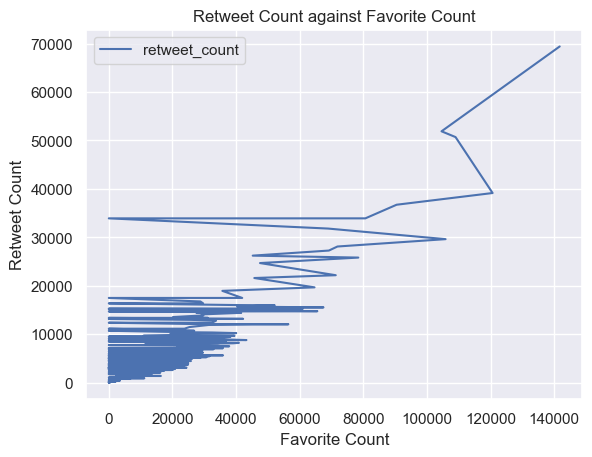

In [1014]:
df_tweets_master.sort_values(by=["retweet_count", 'favorite_count']).plot.line("favorite_count", "retweet_count")
plt.title("Retweet Count against Favorite Count")
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")

### Retweet Count is proportional to Favorite Count

From the statistical overview gotten from `describe()` method, we can see that there's a direct porportion with how high the number of favorite count can get with an increase in retweet count. This makes a lot of sense between when we retweet, we are ideally performing an action that would ensure the tweet gets seen by different users, some of which are not necessarily followers of the original poster.

In [966]:
df_tweets_master['img_num'].value_counts()

1    1762
2     195
3      65
4      31
Name: img_num, dtype: int64

In [979]:
df_tweets_master.sort_values(by=["rating_numerator"])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,possible_breed,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,stage,source_url
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,...,None,326,711,2015-11-29 01:56:48+00:00,Flamboyant pup here. Probably poisonous. Won't...,1,10,None,floofer,http://twitter.com/download/iphone
93,667549055577362432,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,...,None,1899,4983,2015-11-20 03:44:31+00:00,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,floofer,http://twitter.com
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,...,None,2223,5473,2015-12-11 03:21:23+00:00,What kind of person sends in a picture without...,1,10,None,floofer,http://twitter.com/download/iphone
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,...,maltese_dog,55,120,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,floofer,http://twitter.com/download/iphone
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,...,None,5387,12553,2015-11-16 04:02:55+00:00,Not familiar with this breed. No tail (weird)....,1,10,None,floofer,http://twitter.com/download/iphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,...,chow,853,2721,2015-12-18 05:06:23+00:00,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,None,floofer,http://twitter.com/download/iphone
1335,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,labrador_retriever,0.436377,True,chihuahua,0.113956,True,american_staffordshire_terrier,...,labrador_retriever,1994,4371,2016-07-28 01:00:57+00:00,Why does this never happen at my front door......,165,150,None,floofer,http://twitter.com/download/iphone
1147,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,...,None,1122,3465,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved sq...,204,170,this,floofer,http://twitter.com/download/iphone
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,...,None,7439,21447,2015-11-29 05:52:33+00:00,After so many requests... here you go.\n\nGood...,420,10,None,floofer,http://twitter.com/download/iphone


In [991]:
df_tweets_master['name'].value_counts()

None      567
a          55
Tucker     10
Penny      10
Oliver     10
         ... 
Lucky       1
Ricky       1
Fynn        1
Durg        1
Tilly       1
Name: name, Length: 934, dtype: int64

Text(0.5, 1.0, 'Rating Numerator against number of images ')

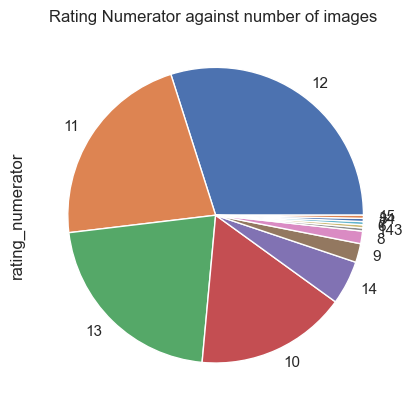

In [1009]:
df_tweets_master[df_tweets_master['img_num'] > 1]['rating_numerator'].value_counts().plot(kind="pie")
plt.title("Rating Numerator against number of images ")

### 2. More Pictures, Higher ratings

From the analysis above, 94% of those who added more than one picture of their dog to the tweet got a rating of 10 and above. Seeing the dog in two or more different view can influence how high they get rated.

In [1019]:
df_tweets_master["name"].value_counts()

None      567
a          55
Tucker     10
Penny      10
Oliver     10
         ... 
Lucky       1
Ricky       1
Fynn        1
Durg        1
Tilly       1
Name: name, Length: 934, dtype: int64

### 3. Standard Intro Format.

Across the dataset, about 25% of the dataset does not contain the name of the dog, which is extracted from the Tweet.
This is because reading the Tweet programmatically, you cannot be 100% sure of what the name of the dog is. Introducing a standard introductory text structure to every tweet would help with this.